In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

In [3]:
data = pd.read_csv("C:\\Users\\kunis\\OneDrive\\Desktop\\ds\\myprojects\\car data (1).csv")
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
data.shape

(301, 9)

In [5]:
data.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [7]:
CompanyName = data['Car_Name'].apply(lambda x : x.split(' ')[0])
data.insert(3,"CompanyName",CompanyName)
data.drop(['Car_Name'],axis=1,inplace=True)
data.head()

,Year,Selling_Price,CompanyName,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,ritz,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,sx4,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,ciaz,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,wagon,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,swift,6.87,42450,Diesel,Dealer,Manual,0


In [8]:
data.CompanyName.unique()

array(['ritz', 'sx4', 'ciaz', 'wagon', 'swift', 'vitara', 's', 'alto',
       'ertiga', 'dzire', 'ignis', '800', 'baleno', 'omni', 'fortuner',
       'innova', 'corolla', 'etios', 'camry', 'land', 'Royal', 'UM',
       'KTM', 'Bajaj', 'Hyosung', 'Mahindra', 'Honda', 'Yamaha', 'TVS',
       'Hero', 'Activa', 'Suzuki', 'i20', 'grand', 'i10', 'eon', 'xcent',
       'elantra', 'creta', 'verna', 'city', 'brio', 'amaze', 'jazz'],
      dtype=object)

In [9]:
data.loc[data.duplicated()]

,Year,Selling_Price,CompanyName,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
17,2016,7.75,ertiga,10.79,43000,Diesel,Dealer,Manual,0
93,2015,23.00,fortuner,30.61,40000,Diesel,Dealer,Automatic,0


C:\Users\kunis\AppData\Local\Temp\ipykernel_8816\3352080077.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.Present_Price)


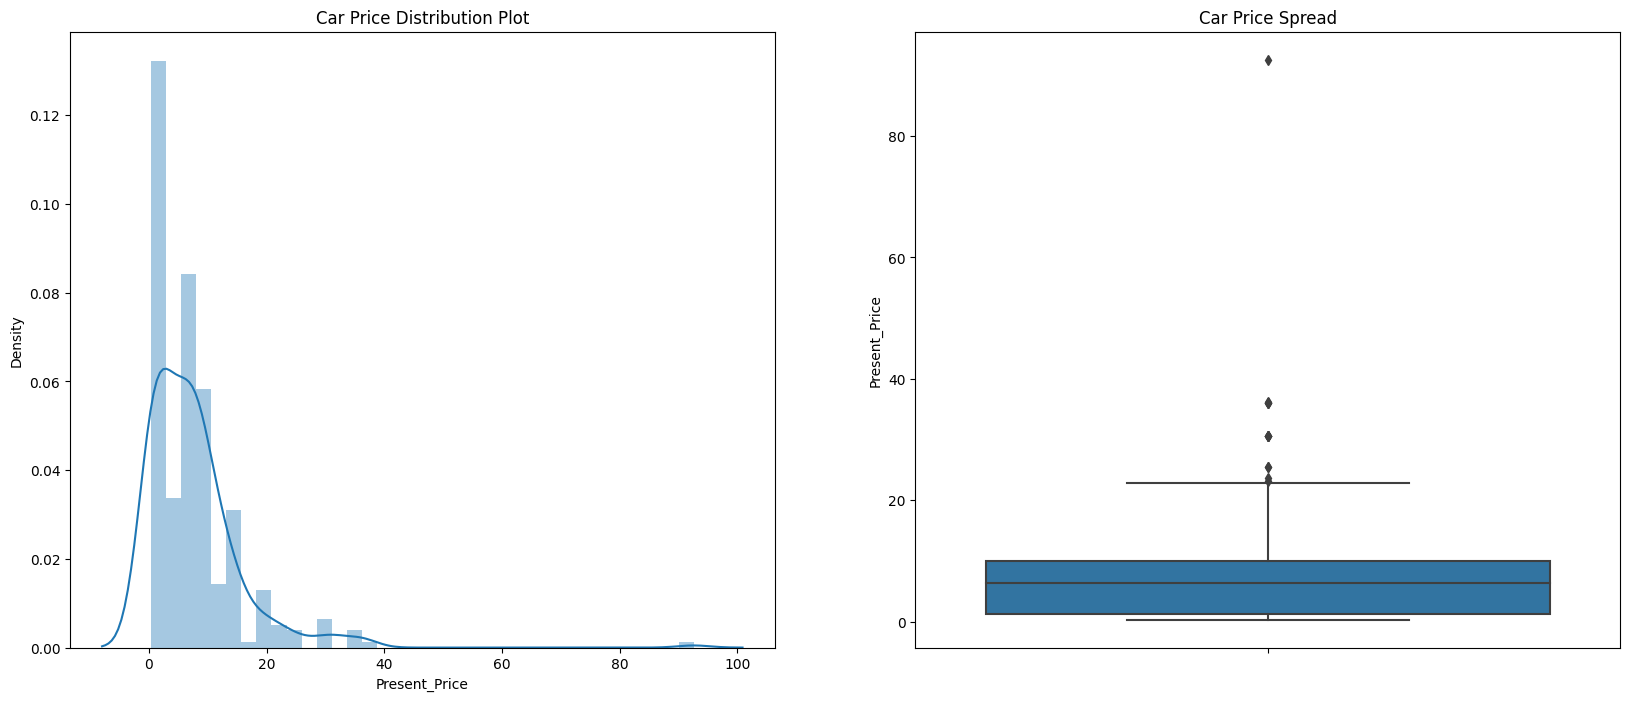

In [10]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Car Price Distribution Plot')
sns.distplot(data.Present_Price)

plt.subplot(1,2,2)
plt.title('Car Price Spread')
sns.boxplot(y=data.Present_Price)

plt.show()

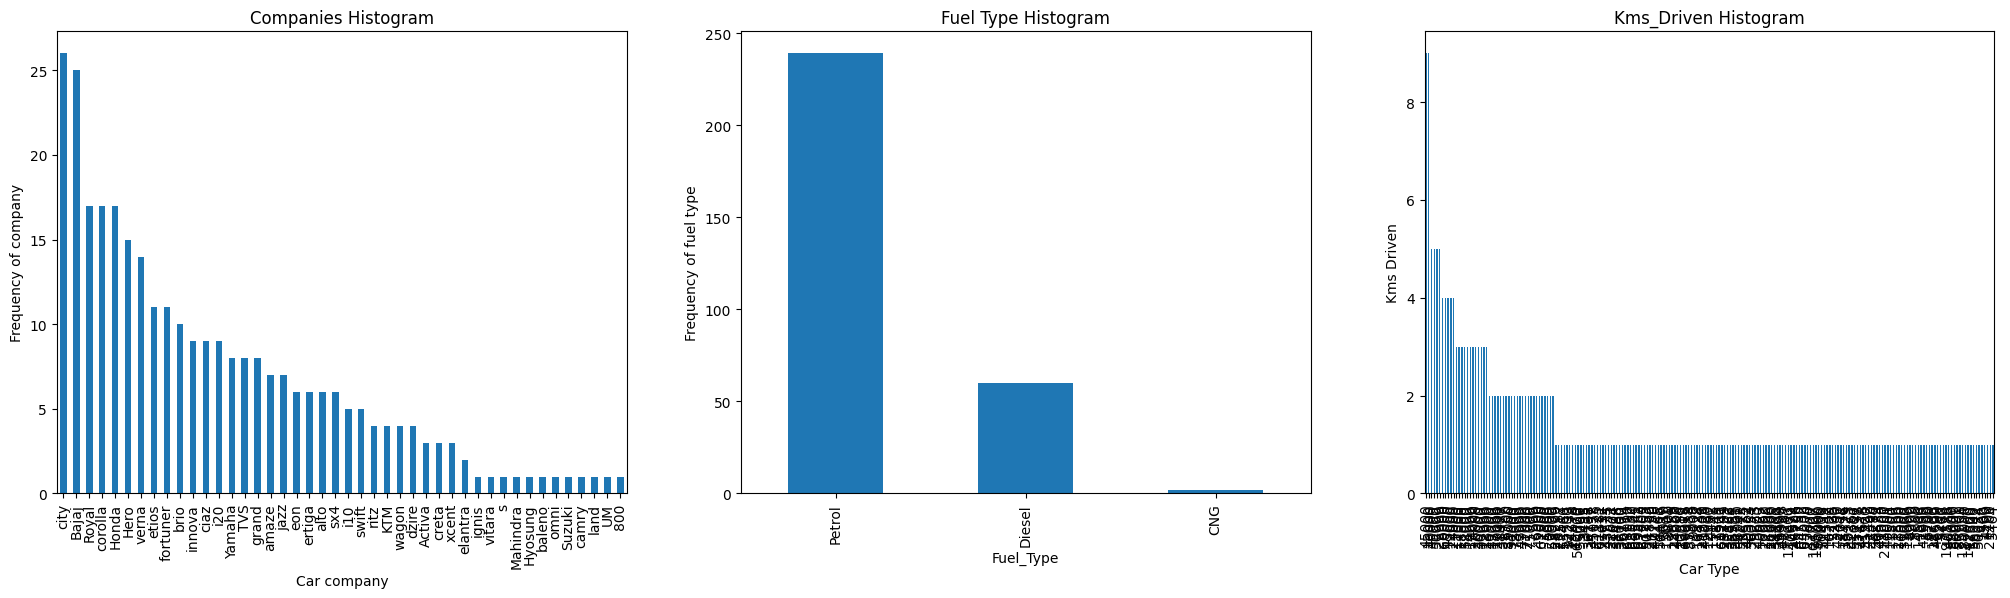

In [11]:
plt.figure(figsize=(25, 6))

plt.subplot(1,3,1)
plt1 = data.CompanyName.value_counts().plot(kind='bar')
plt.title('Companies Histogram')
plt1.set(xlabel = 'Car company', ylabel='Frequency of company')

plt.subplot(1,3,2)
plt1 =data.Fuel_Type.value_counts().plot(kind='bar')
plt.title('Fuel Type Histogram')
plt1.set(xlabel = 'Fuel_Type', ylabel='Frequency of fuel type')

plt.subplot(1,3,3)
plt1 =data.Kms_Driven.value_counts().plot(kind='bar')
plt.title('Kms_Driven Histogram')
plt1.set(xlabel = 'Car Type', ylabel='Kms Driven')

plt.show()

C:\Users\kunis\AppData\Local\Temp\ipykernel_8816\1395186649.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, cmap="RdBu")


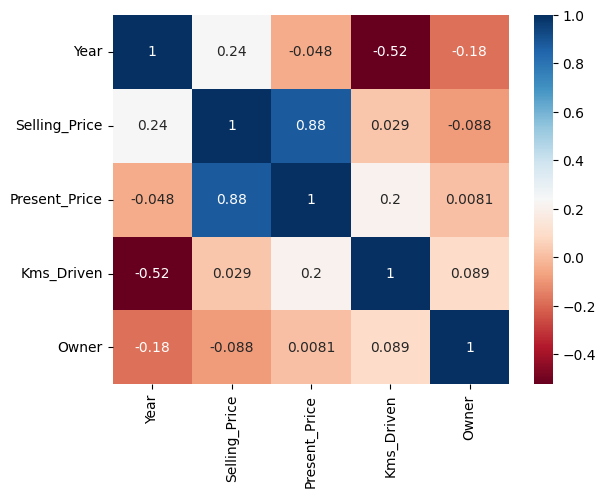

In [12]:
sns.heatmap(data.corr(), annot=True, cmap="RdBu")
plt.show()

In [15]:
df.rename(columns = {'Selling_Price':'Selling_Price(lacs)','Present_Price':'Present_Price(lacs)','Owner':'Past_Owners'},inplace = True)

In [17]:
y = df['Selling_Price(lacs)']
X = df.drop('Selling_Price(lacs)',axis=1)

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
print("x train: ",X_train.shape)
print("x test: ",X_test.shape)
print("y train: ",y_train.shape)
print("y test: ",y_test.shape)

x train:  (240, 51)
x test:  (61, 51)
y train:  (240,)
y test:  (61,)


In [22]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

def car_pred_model(model, model_name):
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    R2_train_model = r2_score(y_train, y_pred_train)
    
    y_pred_test = model.predict(X_test)
    R2_test_model = r2_score(y_test, y_pred_test)
    
    cross_val_scores = cross_val_score(model, X_train, y_train, cv=5)
    
    print("Train R2-score:", round(R2_train_model, 2))
    print("Test R2-score:", round(R2_test_model, 2))
    print("Train CV scores:", cross_val_scores)
    print("Train CV mean:", round(np.mean(cross_val_scores), 2))
    
    fig, ax = plt.subplots(1, 2, figsize=(10, 4))
    
    ax[0].set_title('Residual Plot of Train samples')
    sns.distplot((y_train - y_pred_train), hist=False, ax=ax[0])
    ax[0].set_xlabel('y_train - y_pred_train')
    
    ax[1].set_title('y_test vs y_pred_test')
    ax[1].scatter(x=y_test, y=y_pred_test)
    ax[1].set_xlabel('y_test')
    ax[1].set_ylabel('y_pred_test')
    
    plt.show()

CV = []
R2_train = []
R2_test = []

car_pred_model(model, model_name)


Train R2-score : 0.93
Test R2-score : 0.67
Train CV scores : [0.57800162 0.91912399 0.85603069 0.81940781 0.53442935]
Train CV mean : 0.74


C:\Users\kunis\AppData\Local\Temp\ipykernel_8816\1951069972.py:23: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_train-y_pred_train),hist = False,ax = ax[0])


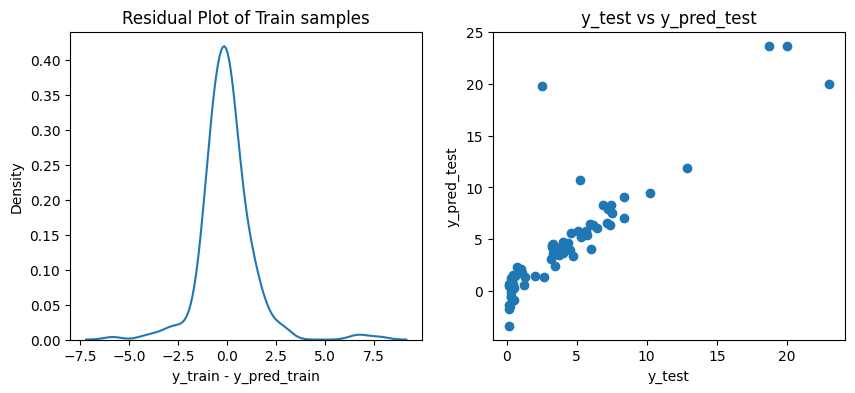

In [23]:
lr = LinearRegression()
car_pred_model(lr,"Linear_regressor.pkl")

In [25]:
Technique = ["LinearRegression"]
results=pd.DataFrame({'Model': Technique,'R Squared(Train)': R2_train,'R Squared(Test)': R2_test,'CV score mean(Train)': CV})
display(results)

,Model,R Squared(Train),R Squared(Test),CV score mean(Train)
0,LinearRegression,0.93,0.67,0.74


In [27]:
R2_train

[0.93]